In [63]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [64]:
img = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_depth_718.8560180664062.png')
np.array(img).shape

(376, 1241)

In [83]:
img = transforms.Resize((128,416))(img)
depth_map=np.array(img)

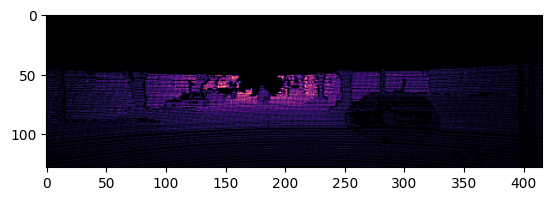

In [84]:
plt.figure("Depth")
plt.imshow(depth_map, cmap='magma')
#plt.colorbar()
plt.show()

In [67]:
print(np.array(img))

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [117  38  56 ...  42  66  36]
 [  0   0   1 ...   1   2   0]
 [173 102 125 ... 114 171  87]]


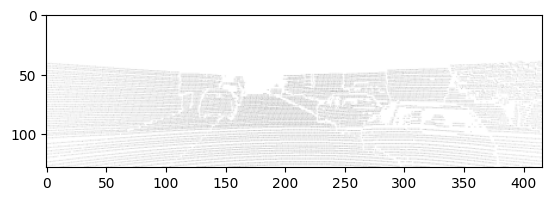

In [45]:
img2 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_gtFine_class.png')

img2 = transforms.Resize((128,416))(img2)
plt.figure("class")
plt.imshow(img2)
plt.show()

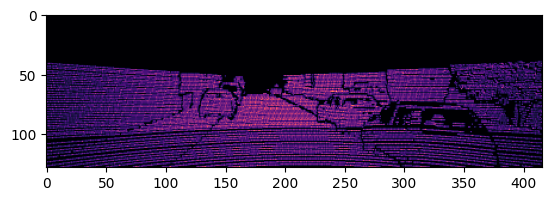

In [46]:
mat=255-np.array(img2)
plt.imshow(mat, cmap='magma')
plt.show()

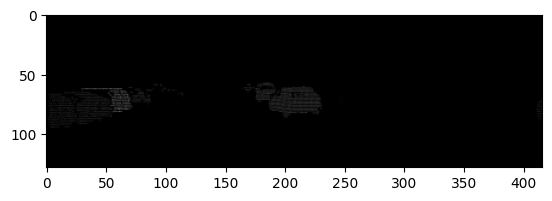

In [47]:
img3 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000000_gtFine_instance.png')
img3 = transforms.Resize((128,416))(img3)
plt.figure("class")
plt.imshow(img3)
plt.show()

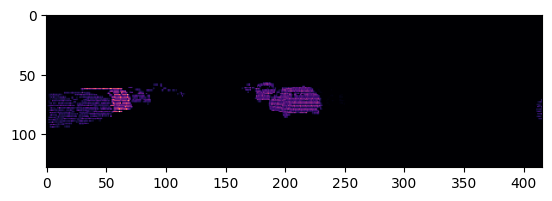

In [48]:
instance=np.array(img3)
plt.figure("class")
plt.imshow(instance, cmap='magma')
plt.show()

In [10]:
print(instance)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


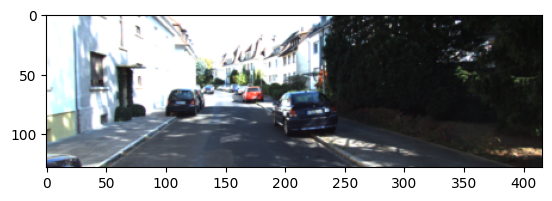

In [104]:
img4 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000213_leftImg8bit.png')
img4 = transforms.Resize((128,416))(img4)
plt.figure("class")
plt.imshow(img4)
plt.show()

In [103]:
img6 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000213_gtFine_instance.png')
img6=np.array(img6)
unique_vals = np.unique(img6)
print(unique_vals)

[  0 119 120 121 239 245 521]


In [88]:
img7 = Image.open('/root/autodl-tmp/video_sequence/train/000000_000201_gtFine_class.png')
img7=np.array(img7)
unique_vals = np.unique(img7)
print(unique_vals)

[  0   8  10  12  13  14  15  16  17 255]


In [38]:
from posenet import posenet
import torch

In [19]:
pose_net=posenet.PoseExpNet(nb_ref_imgs=1, output_exp=False)

In [20]:
pose_net.eval()

PoseExpNet(
  (conv1): Sequential(
    (0): Conv2d(6, 16, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv7): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (pose_pred): Conv2d(256, 6, kernel_size=(1, 1), stride=(1, 1))
)

In [21]:
to_tensor = transforms.ToTensor()
target=to_tensor(img4.convert("RGB")).unsqueeze(0)
source=to_tensor(img2.convert("RGB")).unsqueeze(0)

In [22]:
exp_mask, pose = pose_net(target, [source])

In [23]:
pose

tensor([[[ 6.5508e-04,  8.6054e-05, -5.7783e-04, -5.3078e-04,  5.9473e-04,
          -2.3796e-04]]], grad_fn=<MulBackward0>)

In [24]:
exp_mask